In [1]:
!pip3 install matplotlib

    100% |################################| 37.9MB 14kB/s eta 0:00:011    54% |#################               | 20.5MB 2.0MB/s eta 0:00:09    58% |##################              | 22.2MB 2.2MB/s eta 0:00:08    96% |##############################  | 36.5MB 2.3MB/s eta 0:00:01########################## | 37.5MB 2.9MB/s eta 0:00:01
    100% |################################| 61kB 3.0MB/s ta 0:00:011
  Running setup.py bdist_wheel for matplotlib ... done
  Stored in directory: /root/.cache/pip/wheels/0c/0b/94/f8ef543a2a1dbbf611ea039097bc574f07d101da19ebeec399
  Running setup.py bdist_wheel for kiwisolver ... done
  Stored in directory: /root/.cache/pip/wheels/69/47/4f/edfc446936a7fcde3e0ca13a51e0ff3ba1d4e12c1c74180254
Successfully built matplotlib kiwisolver


hosting price 10667.280000
min(jira_standard, dc_setup)=17221.620000
price/user/month (dc_setup)=5.930740
price/user/month (jira_standard)=4.495605
price/user/month (jira_premium)=8.150000


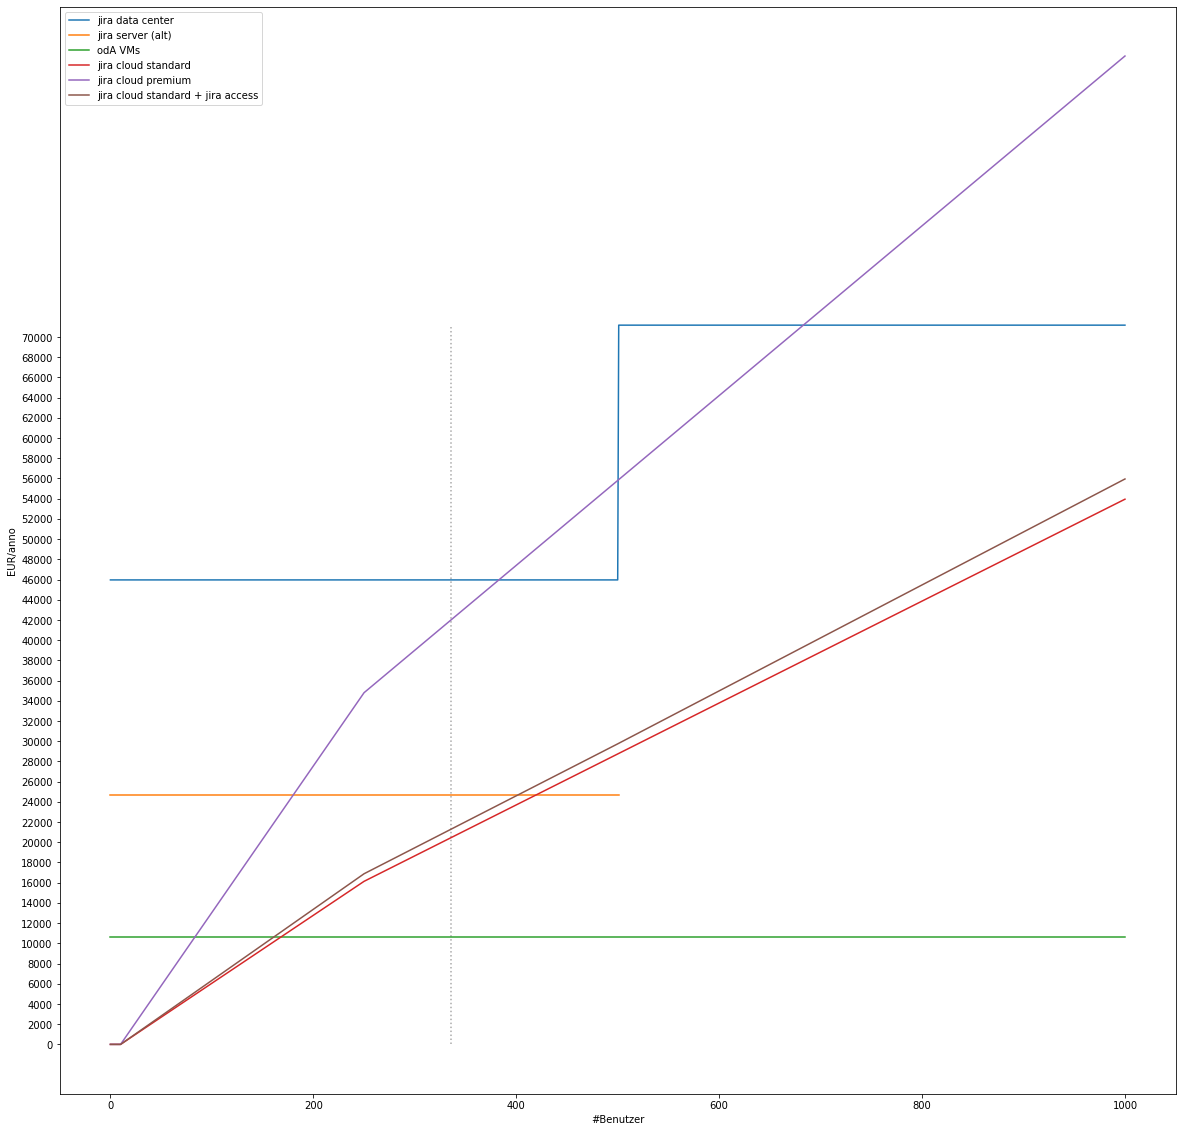

In [2]:
# dollars yearly

usd2eur = 0.8403 # 13.04.2021 https://www.dollars2euro.com/

# 8 VMs (4 cores, 8 GB RAM), 65 € / month Wartung, zzgl. speicher zzgl. ?
hostingPrice = 888.94 * 12 

ticks = [0, 10, 250, 500, 501, 1000]

srvPrice = [14000 + hostingPrice] * len(ticks) # euro für 500 user, zahlen von DBE
dcPrice = [42000, 42000, 42000, 42000, 72000, 72000]
cloudPrice = [0, 0, 1600*12, 2850*12, 2855*12, 5350 * 12] # rabbat bei annual -2 month rates
cloudPricePremium = [0, 0, 2900 * 12, 4650 * 12, 4657*12, 8150 * 12]
accessPrice = [0, 0, 3*250, 2*500, 2*501, 2*1000]

dcPrice = [p * usd2eur + hostingPrice for p in dcPrice]
cloudPrice = [p * usd2eur for p in cloudPrice]
cloudAccessPrice = [cl_p + acc_p for cl_p, acc_p in zip(cloudPrice, accessPrice)]

userCount = 336 # users registered, implicit registration via jira crowd

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20,20))
plt.yticks(np.arange(0,max(dcPrice),2000))
plt.plot(ticks, dcPrice, label='jira data center')
plt.plot(ticks[:-1], srvPrice[:-1], label='jira server (alt)')
plt.plot(ticks, [hostingPrice] * len(ticks), label='odA VMs')
plt.plot(ticks, cloudPrice, label='jira cloud standard')
plt.plot(ticks, cloudPricePremium, label='jira cloud premium')
plt.plot(ticks, cloudAccessPrice, label='jira cloud standard + jira access')
# plt.plot(ticks, [dc_p - cl_p for dc_p, cl_p in zip(dcPrice, cloudAccessPrice)], ':', label='diff')
plt.ylabel('EUR/anno')
plt.xlabel('#Benutzer')
plt.vlines(userCount, min(cloudPrice), max(dcPrice), colors='darkgray', linestyles=':')
plt.legend()
fig.savefig('jira_costs.png', dpi=72)

print('hosting price %f' % hostingPrice)
print('min(jira_standard, dc_setup)=%f' % min([dc_p - cl_p for dc_p, cl_p in zip(dcPrice, cloudPrice)]))
print('price/user/month (dc_setup)=%f' % min([dc_p / user_c / 12 for dc_p, user_c in zip(dcPrice[1:], ticks[1:])]))
print('price/user/month (jira_standard)=%f' % min([dc_p / user_c / 12 for dc_p, user_c in zip(cloudPrice[2:], ticks[2:])]))
print('price/user/month (jira_premium)=%f' % min([dc_p / user_c / 12 for dc_p, user_c in zip(cloudPricePremium[2:], ticks[2:])]))

plt.show()